In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('data_science_job.csv')

In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
df.shape

(19158, 13)

In [7]:
cols=[var for var in df.columns if df[var].isnull().mean()< 0.05 and df[var].isnull().mean()>0] 
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
7248,0.923,no_enrollment,Graduate,1.0,102.0
18091,0.910,no_enrollment,Graduate,20.0,73.0
17049,0.920,no_enrollment,Graduate,20.0,170.0
18668,0.698,no_enrollment,Graduate,13.0,68.0
18346,0.910,no_enrollment,Graduate,20.0,82.0


In [9]:
#checking for rows if the missing rows are deleted
len(df[cols].dropna())/len(df) * 100

89.68577095730244

In [10]:
new_df=df[cols].dropna()
df.shape,  new_df.shape

((19158, 13), (17182, 5))

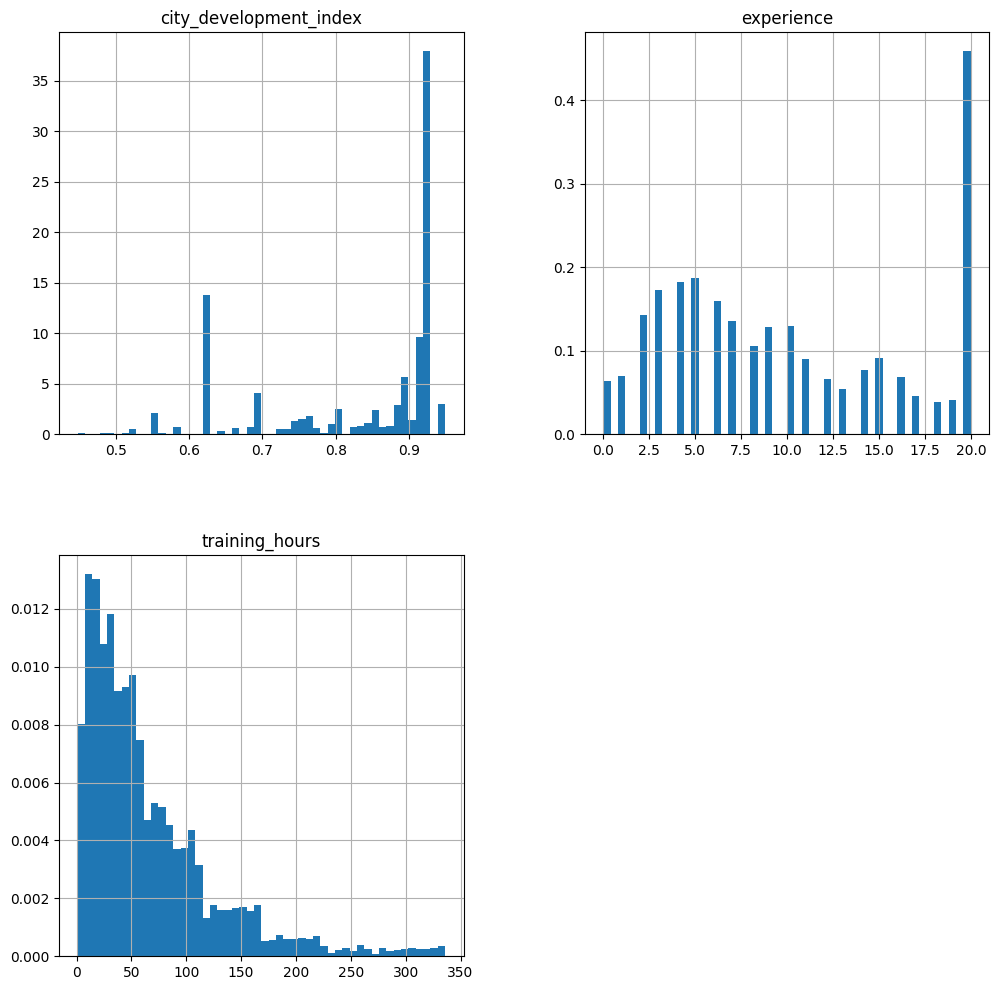

In [11]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<Axes: >

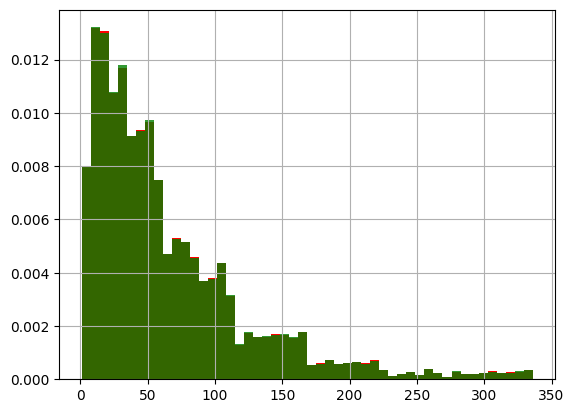

In [12]:
fig=plt.figure()
ax= fig.add_subplot(111)

#original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

#data after ccr

new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.8)

In [13]:
#maintaining the ratio of categories

temp=pd.concat([
    df['enrolled_university'].value_counts()/len(df),
    new_df['enrolled_university'].value_counts()/ len(new_df)
], axis=1)

temp.columns=['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
